In [1]:
import numpy as np
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
# ambil lebar dan tinggi img
img_rows, img_cols = 102, 136   # sengaja dibalik ukuranya

data_path = './dataset/'

# variabel untuk menyimpan img (x) & label (y)
x, y = [], []

# variabel untuk label (boot:0 | sandal:1 | shoe:2)
counter = 0

In [3]:
# mengambil semua class yg ada di dataset
classes = os.listdir(data_path)

print(classes)

# process img dari dataset dan masukin ke variabel x & y
for class_path in os.listdir(data_path):                        # untuk classnya (boot, shoe, sendal)
    for img_path in os.listdir(f'{data_path}{class_path}'):     # untuk img nya
        path = f'{data_path}{class_path}/{img_path}'
        label = counter

        # load img
        image = tf.keras.preprocessing.image.load_img(path, target_size=(img_rows, img_cols), color_mode='grayscale')

        # ubah img jadi array
        image = tf.keras.preprocessing.image.img_to_array(image)

        x.append(image)
        y.append(label)
    
    counter += 1

['Boot', 'Sandal', 'Shoe']


In [4]:
# Ubah x & y Jadi Array

x = np.array(x)
y = np.array(y)

In [5]:
# Normalize x

x = x.astype('float32') / 255.0

In [6]:
# Split Dataset

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
# Ubah variabel y (target) dengan One Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=3)

print(x_train.shape)

# noted:
# - (jumlah data, tinggi img, lebar img, jumlah channel (3 karna rgb))

(12000, 102, 136, 1)


In [ ]:
# Bikin Model Dengan Menyesuaikan PPT

model = tf.keras.Sequential()

# 1. convolutional layer I 
model.add(tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(img_rows, img_cols, 1)))  

# 2. average pooling I
model.add(keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2))  

# 3. convolutional layer 2
model.add(keras.layers.Conv2D(16, (5, 5), activation='relu'))   

# 4. average pooling 2
model.add(keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2))  

# 5. flattening
model.add(keras.layers.Flatten())
 
# 6. fully connected layer (dense layer dgn neruron 120)
model.add(keras.layers.Dense(120, activation='relu'))

# 7. fully connected layer (dense layer dgn neruron 84)
model.add(keras.layers.Dense(84, activation='relu'))

# 8. fully connected layer (dense layer dgn neuron 3)
model.add(keras.layers.Dense(3, activation='softmax'))

# Model Summary
model.summary()

c:\Python\environments\deep_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 132, 6)     │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 49, 66, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 62, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 22, 31, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,309,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,322,551 (5.05 MB)

 Trainable params: 1,322,551 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=120, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - accuracy: 0.8141 - loss: 0.4444 - val_accuracy: 0.8973 - val_loss: 0.2798
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.9255 - loss: 0.2075 - val_accuracy: 0.9287 - val_loss: 0.1956
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.9432 - loss: 0.1561 - val_accuracy: 0.9400 - val_loss: 0.1697
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 221ms/step - accuracy: 0.9563 - loss: 0.1225 - val_accuracy: 0.9507 - val_loss: 0.1442
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.9631 - loss: 0.1028 - val_accuracy: 0.9507 - val_loss: 0.1510
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - accuracy: 0.9737 - loss: 0.0776 - val_accuracy: 0.9560 - val_loss: 0.1324
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.9779 - loss: 0.0642 - val_accuracy: 0.9487 - val_loss: 0.1516
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.9818 - loss: 0

In [10]:
score = model.evaluate(x_test, y_test)

print(f'Loss: {score[0]}')
print(f'Acc: {score[1]}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9680 - loss: 0.1314
Loss: 0.13144993782043457
Acc: 0.9679999947547913


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


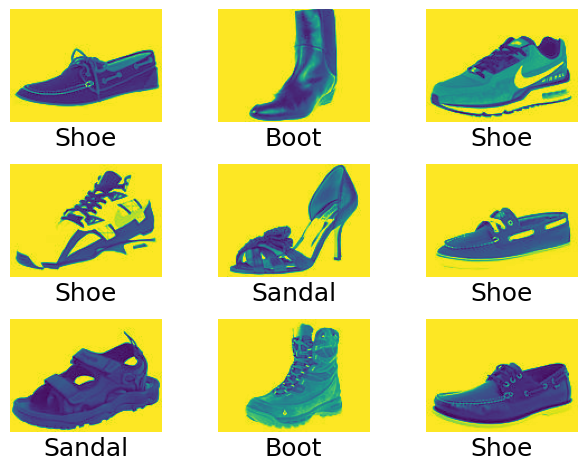

In [11]:
# Model Prediction

y_predic = model.predict(x_test)
predict_label = np.argmax(y_predic, axis=1)     # ambil class dgn probability pling besar

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')

    # menampilkan text hasil prediction 
    plt.text(0.5, -0.20, classes[predict_label[i]], fontsize=18, ha='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# noted:
# - transform=plt.gca().transAxes   -> ambil axis dari current subplot
# - 0.5 x                           -> agak ke kanan
# - -0.18 y                         -> agak turun  

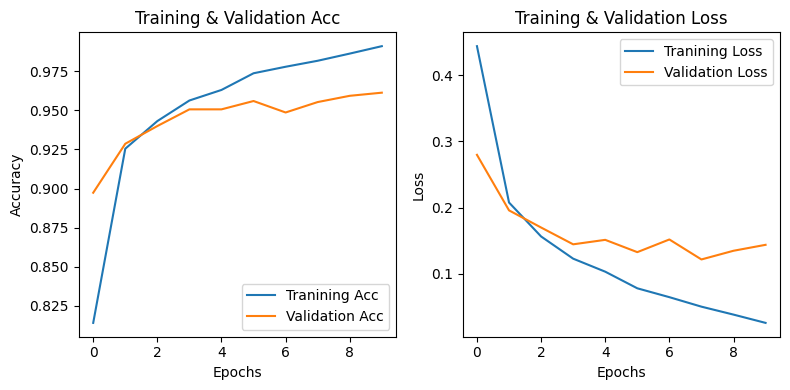

In [12]:
# Plotting Evaluation

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Tranining Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Acc')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Tranining Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')  
plt.title('Training & Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
model.save('model.h5')